# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import tensorflow as tf
import numpy as np
import cv2

# TODO: Fill this in based on where you saved the training and testing data

training_file = "/Users/shrutireddye/Downloads/traffic-signs-data/train.p"
testing_file = "/Users/shrutireddye/Downloads/traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import matplotlib.image as img
import pylab
import csv

# Visualizations will be shown in the notebook.
%matplotlib inline
#f = pylab.figure()


# Reading the labels for the training set from the "signnames.csv" file
# Saves labels into a new array label_name. 
label_name = []
label_file = open('signnames.csv')
label_reader = csv.DictReader(label_file)
for label in label_reader:
    #print(label)
    #label_name.append(label['SignName'])
    label_name.append(label)

#Quick check to see all the data is read correctly from the .csv file    
#print(label_name) 

In [4]:
#Plotting the distribution of the classes in the training set

from collections import Counter
from operator import itemgetter, attrgetter

# Use a Counter to count the number of instances in x
def analyze_data(y_labels):
    c = Counter(y_labels)
    plt.bar(c.keys(), c.values())
    plt.xticks(np.arange(43), label_name, rotation='vertical')
    plt.show()

    for i in c:
        print(label_name[i], 'Occurs', c[i], 'times')
        
#Test the analyze_data function
#analyze_data(y_train)


In [5]:
#Creating a function to plot random images from any given set

import random

def visualize(X_features, y_labels, row, col):
    sample_set = row*col
    fig = plt.figure()
    fig.suptitle('Plotting Random Images from requested sample')
    for i in range(sample_set):
        index = random.randint(0, len(X_features))
        #print(label_name[y_train[index]])
        image = X_features[index].squeeze() 
        fig.add_subplot(row, col, i+1)
        plt.imshow(image)
        #ax = plt.subplot(row, col, i+1)
        plt.title(y_train[index])
        plt.axis('off')        
    fig.tight_layout(pad=2.0, w_pad=0.5, h_pad=1.0)
    plt.show()

    
#Test the visualize function
#vizualize(X_train, y_train,4,5)


In [6]:
# Creating a function to plot one image from each class on any given data set


def visualize_all(X_features, y_labels):
    """Display the first image of each label."""
      
    fig = plt.figure()
    fig.suptitle('Plotting one image from each Class')
    for i in range(n_classes):
        for j in range(len(y_labels)):
            if (i == y_labels[j]):
                print('Class: ', i)
                plt.imshow(X_features[j])
                plt.axis('off')  
                plt.show()
                #fig.add_subplot(11, 4, i+1)
                #plt.imshow(X_features[j])
                #plt.title(y_labels[j])
                #plt.axis('off')
                #plt.show()
                break

 
   


# In the below code blocks, we will begin to analyze the training data as well as the testing data.


## First let us start with the training data

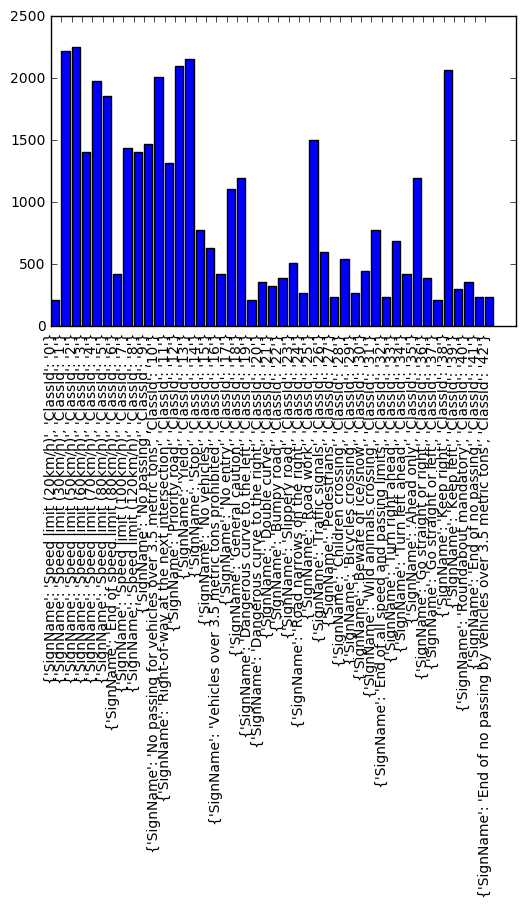

{'SignName': 'Speed limit (20km/h)', 'ClassId': '0'} Occurs 210 times
{'SignName': 'Speed limit (30km/h)', 'ClassId': '1'} Occurs 2220 times
{'SignName': 'Speed limit (50km/h)', 'ClassId': '2'} Occurs 2250 times
{'SignName': 'Speed limit (60km/h)', 'ClassId': '3'} Occurs 1410 times
{'SignName': 'Speed limit (70km/h)', 'ClassId': '4'} Occurs 1980 times
{'SignName': 'Speed limit (80km/h)', 'ClassId': '5'} Occurs 1860 times
{'SignName': 'End of speed limit (80km/h)', 'ClassId': '6'} Occurs 420 times
{'SignName': 'Speed limit (100km/h)', 'ClassId': '7'} Occurs 1440 times
{'SignName': 'Speed limit (120km/h)', 'ClassId': '8'} Occurs 1410 times
{'SignName': 'No passing', 'ClassId': '9'} Occurs 1470 times
{'SignName': 'No passing for vehicles over 3.5 metric tons', 'ClassId': '10'} Occurs 2010 times
{'SignName': 'Right-of-way at the next intersection', 'ClassId': '11'} Occurs 1320 times
{'SignName': 'Priority road', 'ClassId': '12'} Occurs 2100 times
{'SignName': 'Yield', 'ClassId': '13'} Occu

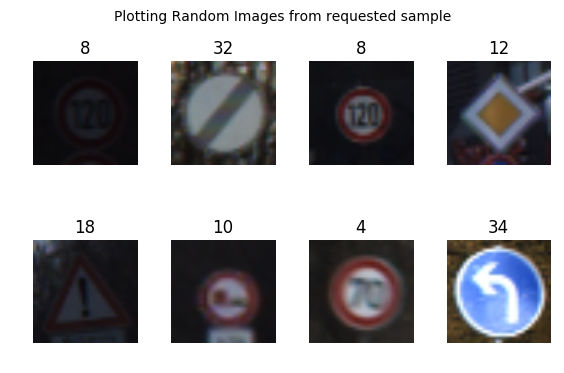

In [7]:
#Function to plot occurences of each traffic sign on a bar graph
analyze_data(y_train) 

#Plot a random set of 8 images from the training set. The number above each image indicates the Class ID
visualize(X_train, y_train,2,4) 

Looking at the data above we can see that not all the different traffic signs are represented equally. This may be critical in the network being able to recognize the test data set with consistent accuracy especially for the under represented traffic signs.


## Next, let us repeat this for the test data


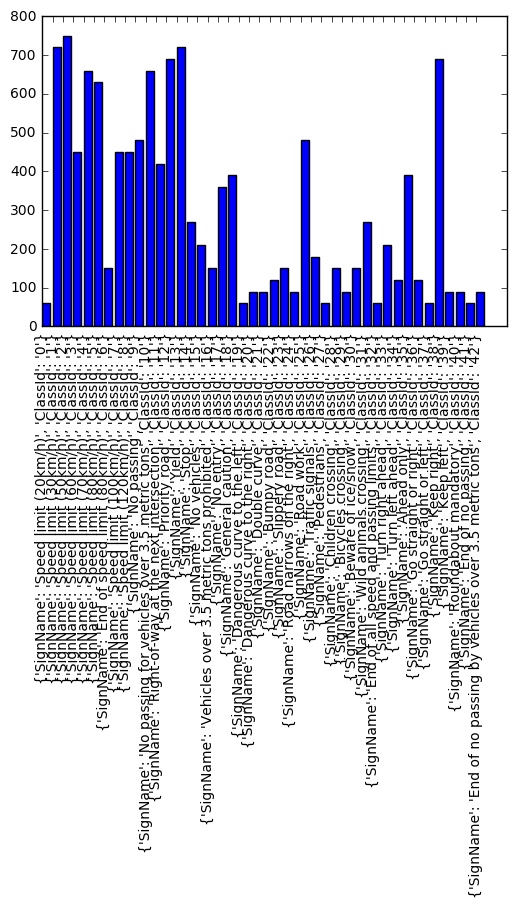

{'SignName': 'Speed limit (20km/h)', 'ClassId': '0'} Occurs 60 times
{'SignName': 'Speed limit (30km/h)', 'ClassId': '1'} Occurs 720 times
{'SignName': 'Speed limit (50km/h)', 'ClassId': '2'} Occurs 750 times
{'SignName': 'Speed limit (60km/h)', 'ClassId': '3'} Occurs 450 times
{'SignName': 'Speed limit (70km/h)', 'ClassId': '4'} Occurs 660 times
{'SignName': 'Speed limit (80km/h)', 'ClassId': '5'} Occurs 630 times
{'SignName': 'End of speed limit (80km/h)', 'ClassId': '6'} Occurs 150 times
{'SignName': 'Speed limit (100km/h)', 'ClassId': '7'} Occurs 450 times
{'SignName': 'Speed limit (120km/h)', 'ClassId': '8'} Occurs 450 times
{'SignName': 'No passing', 'ClassId': '9'} Occurs 480 times
{'SignName': 'No passing for vehicles over 3.5 metric tons', 'ClassId': '10'} Occurs 660 times
{'SignName': 'Right-of-way at the next intersection', 'ClassId': '11'} Occurs 420 times
{'SignName': 'Priority road', 'ClassId': '12'} Occurs 690 times
{'SignName': 'Yield', 'ClassId': '13'} Occurs 720 times

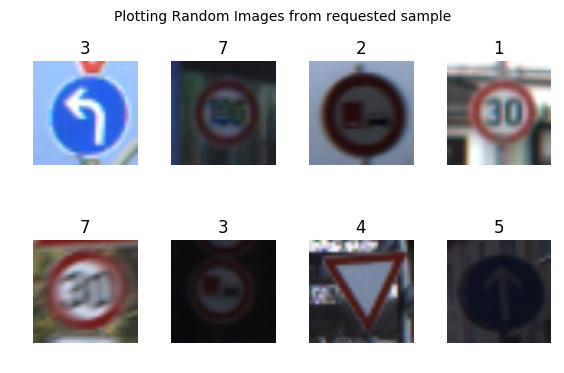

In [8]:
#Function to plot occurences of each traffic sign on a bar graph
analyze_data(y_test) 

#Plot a random set of 8 images from the training set. The number above each image indicates the Class ID
visualize(X_test, y_test,2,4) 

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

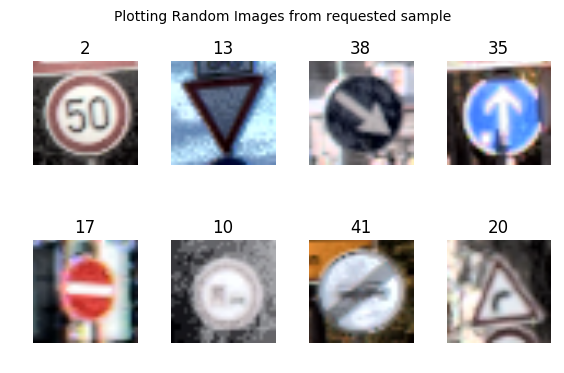

In [9]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

# Convert images to YUV space and normalize using cv2
# https://www.packtpub.com/mapt/book/Application-Development/
#                               9781785283932/2/ch02lvl1sec26/Enhancing%20the%20contrast%20in%20an%20image
new_X_train = np.copy(X_train)
new_y_train = np.copy(y_train)
new_X_test = np.copy(X_test)
new_y_test = np.copy(y_test)

def pre_process_colorspace(X_features):
    classsize = len(X_features)
    for i in range(classsize):
                
        X_features[i] = cv2.cvtColor(X_features[i], cv2.COLOR_BGR2YUV)
        # equalize the histogram of the Y channel
        X_features[i][:,:,0] = cv2.equalizeHist(X_features[i][:,:,0])
        
        # convert the YUV image back to RGB format
        X_features[i] = cv2.cvtColor(X_features[i], cv2.COLOR_YUV2BGR)

                     
# Test function
pre_process_colorspace(new_X_train)
visualize(new_X_train, new_y_train,2,4)

Class:  0


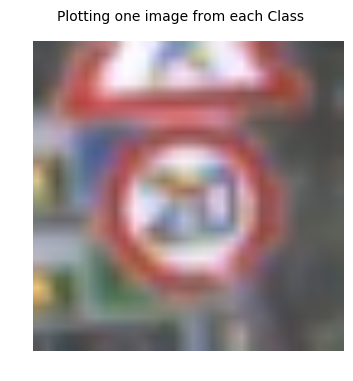

Class:  1


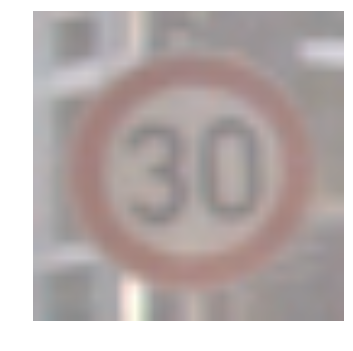

Class:  2


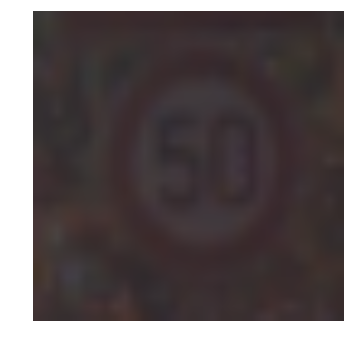

Class:  3


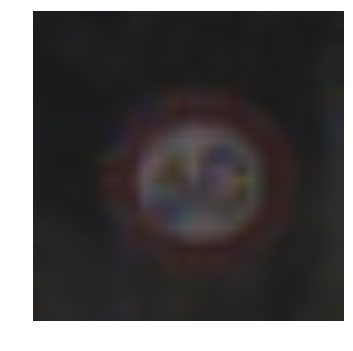

Class:  4


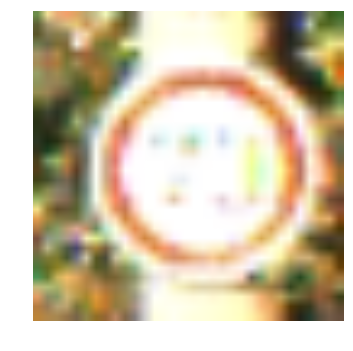

Class:  5


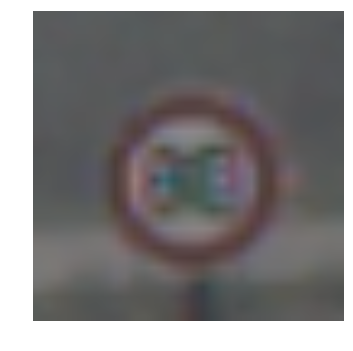

Class:  6


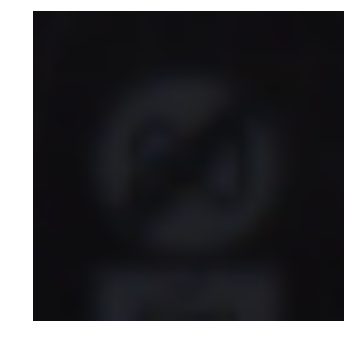

Class:  7


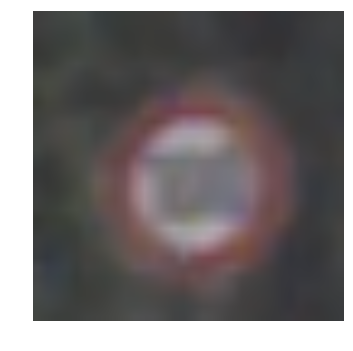

Class:  8


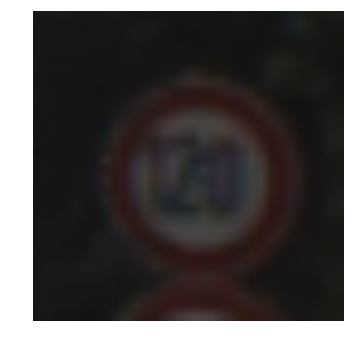

Class:  9


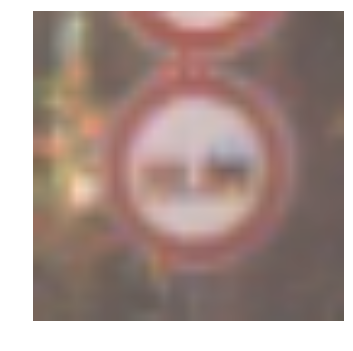

Class:  10


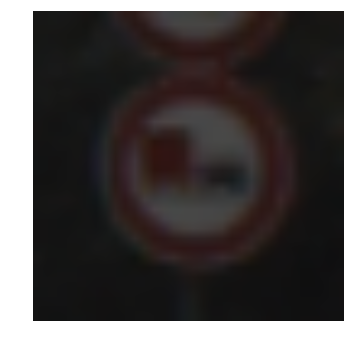

Class:  11


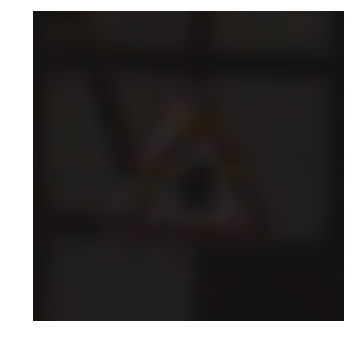

Class:  12


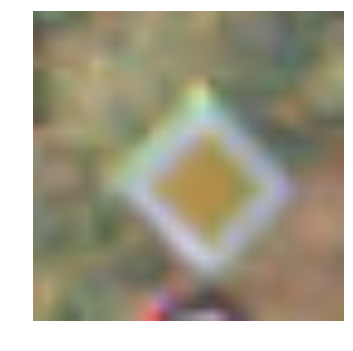

Class:  13


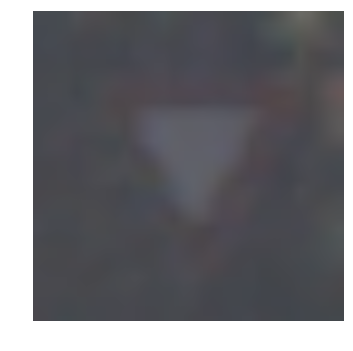

Class:  14


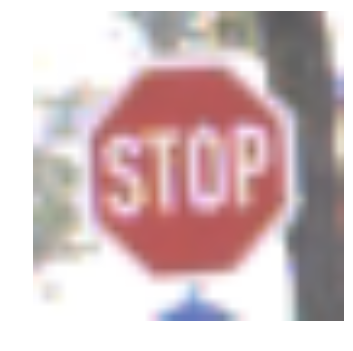

Class:  15


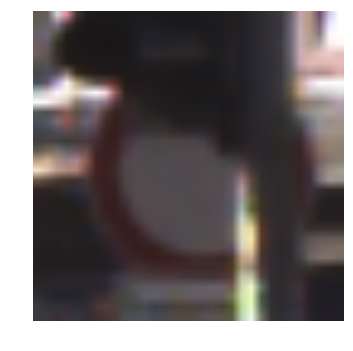

Class:  16


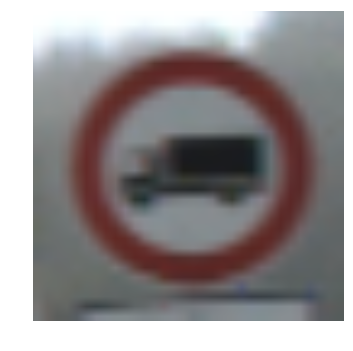

Class:  17


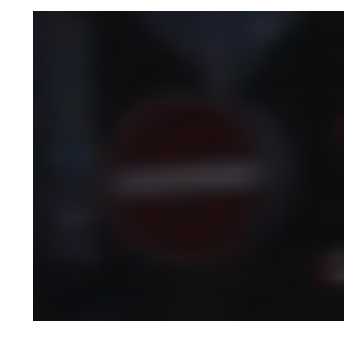

Class:  18


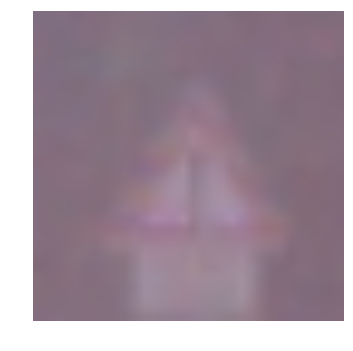

Class:  19


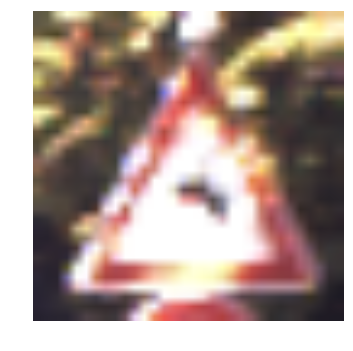

Class:  20


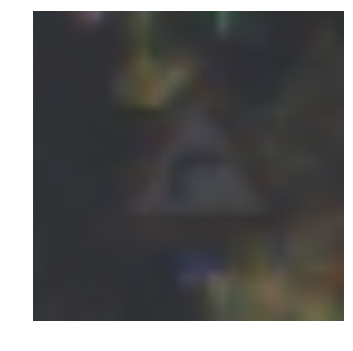

Class:  21


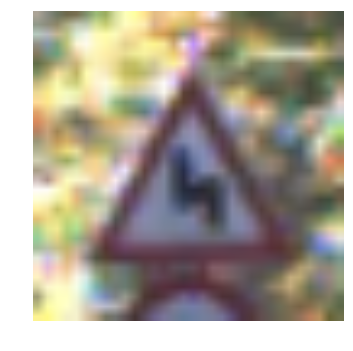

Class:  22


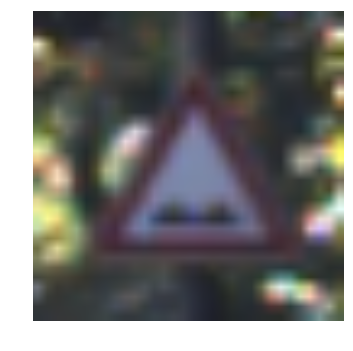

Class:  23


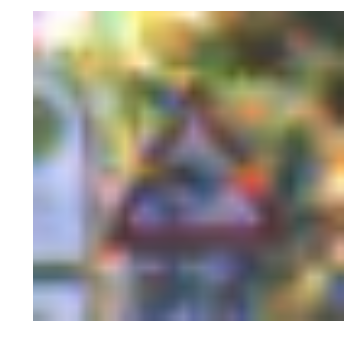

Class:  24


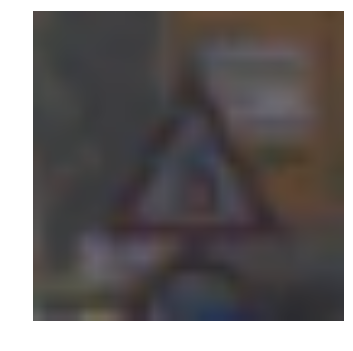

Class:  25


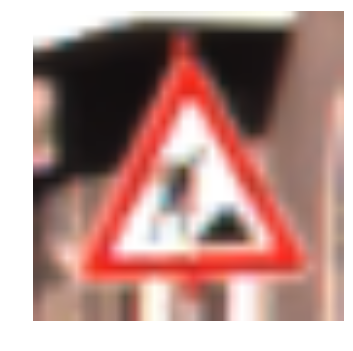

Class:  26


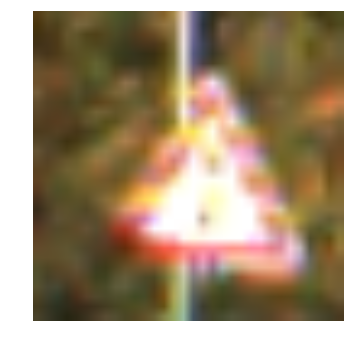

Class:  27


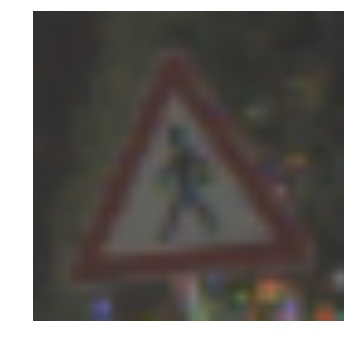

Class:  28


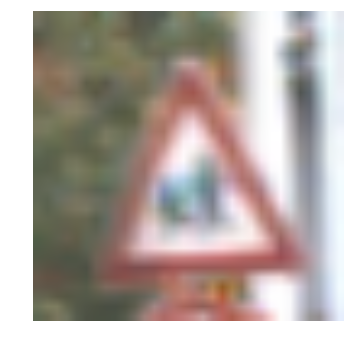

Class:  29


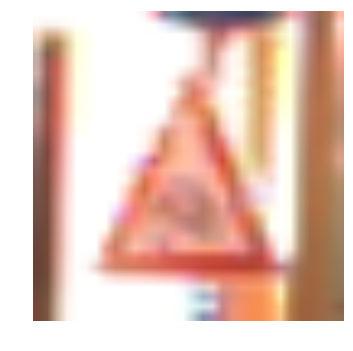

Class:  30


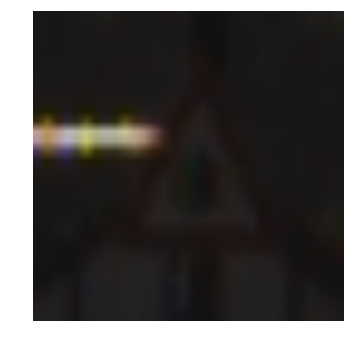

Class:  31


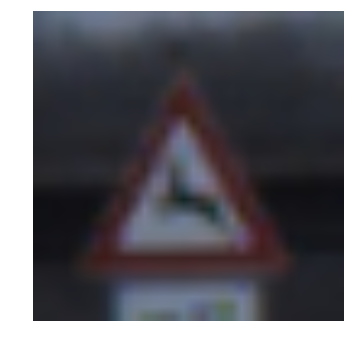

Class:  32


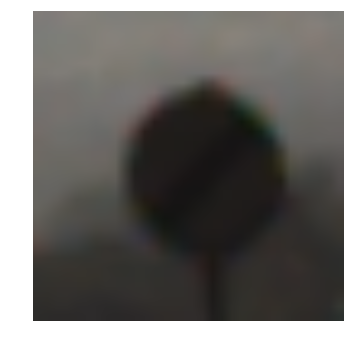

Class:  33


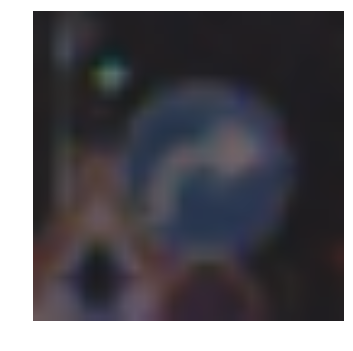

Class:  34


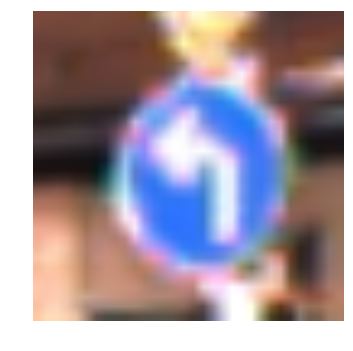

Class:  35


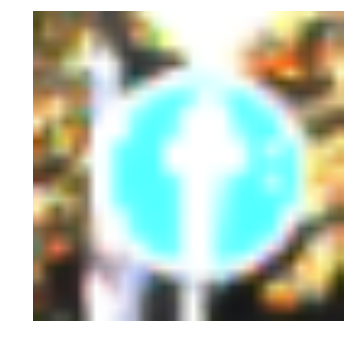

Class:  36


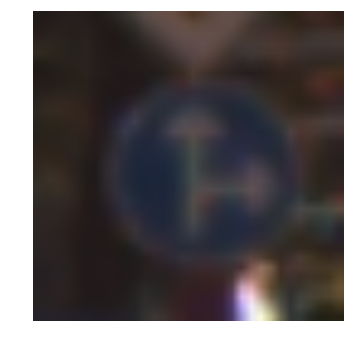

Class:  37


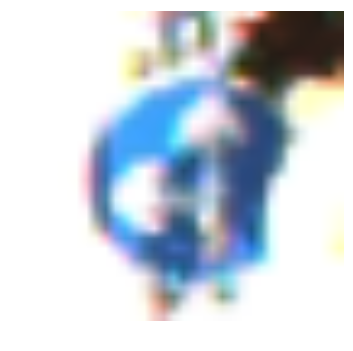

Class:  38


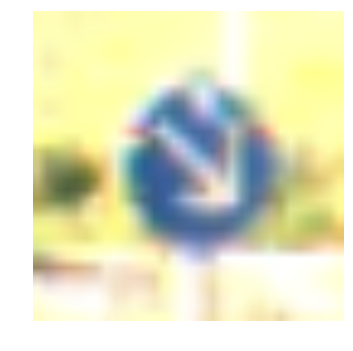

Class:  39


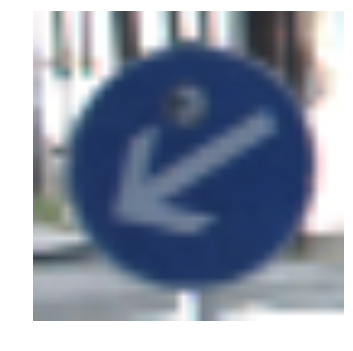

Class:  40


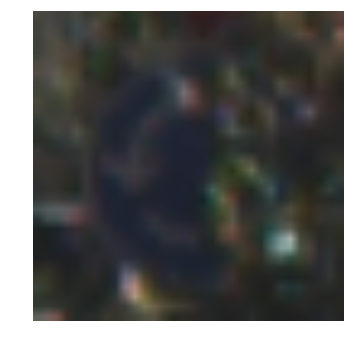

Class:  41


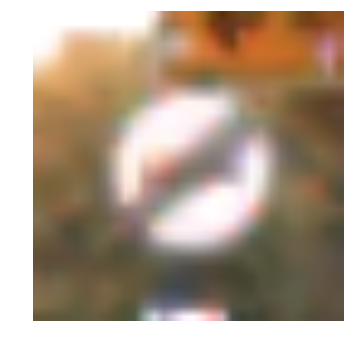

Class:  42


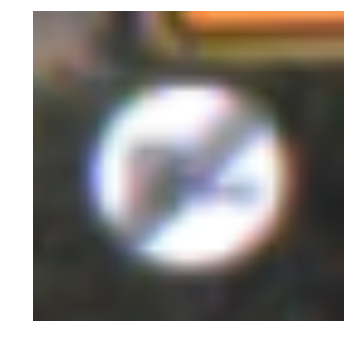

In [10]:
# Original Training Set
visualize_all(X_train, y_train)

Class:  0


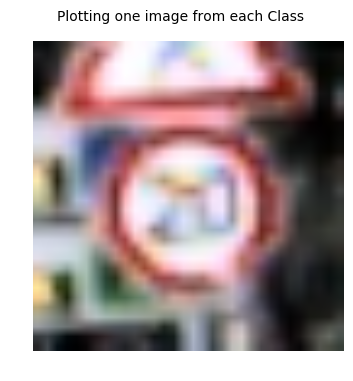

Class:  1


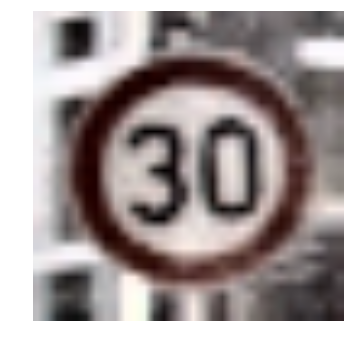

Class:  2


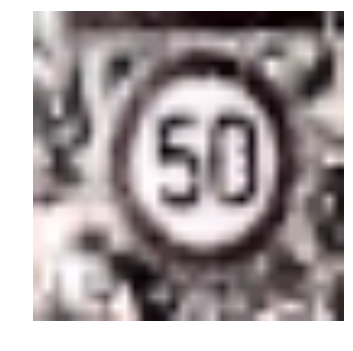

Class:  3


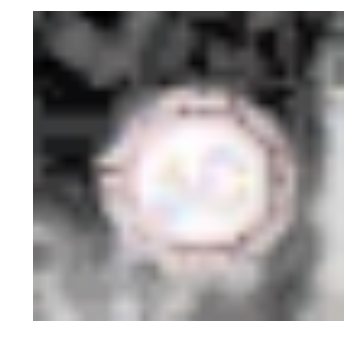

Class:  4


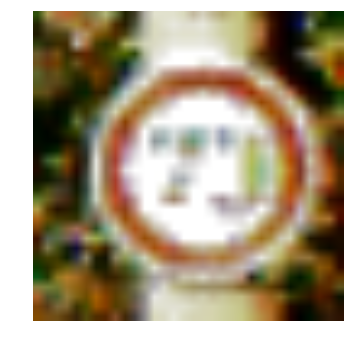

Class:  5


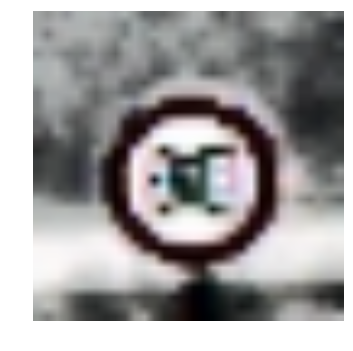

Class:  6


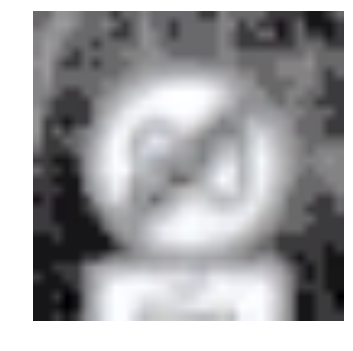

Class:  7


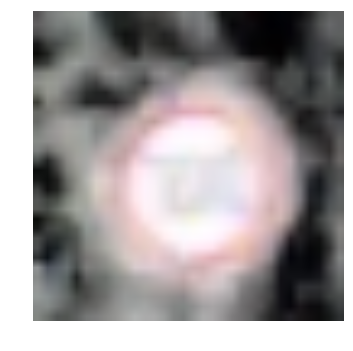

Class:  8


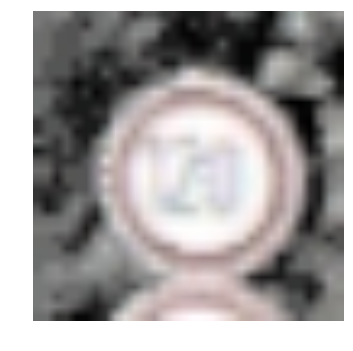

Class:  9


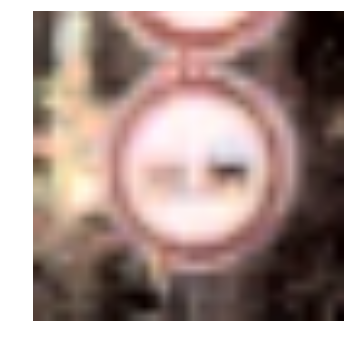

Class:  10


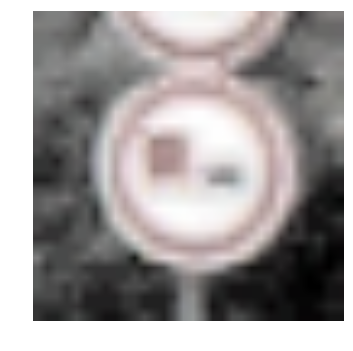

Class:  11


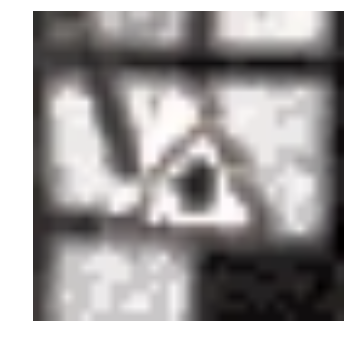

Class:  12


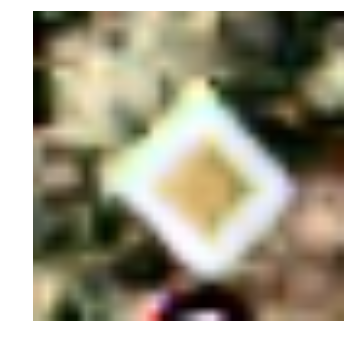

Class:  13


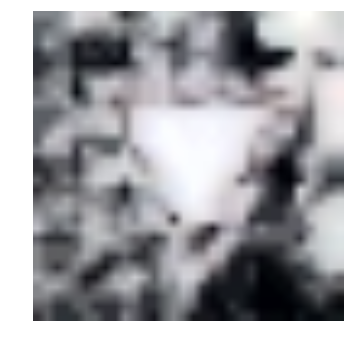

Class:  14


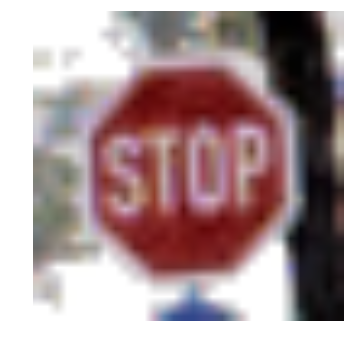

Class:  15


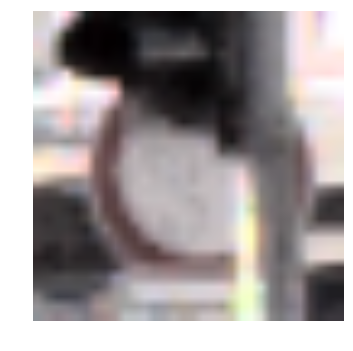

Class:  16


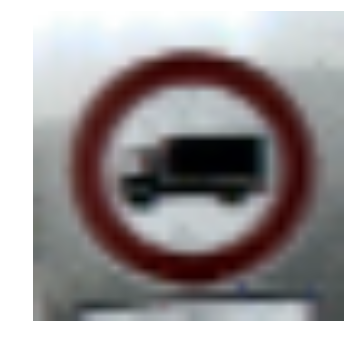

Class:  17


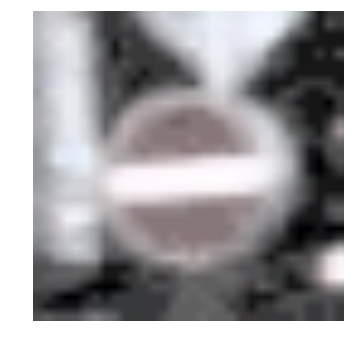

Class:  18


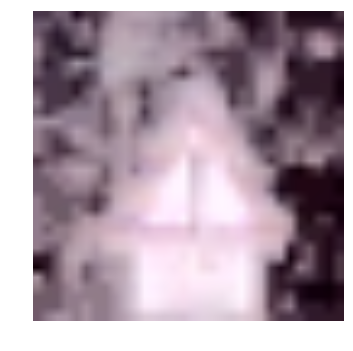

Class:  19


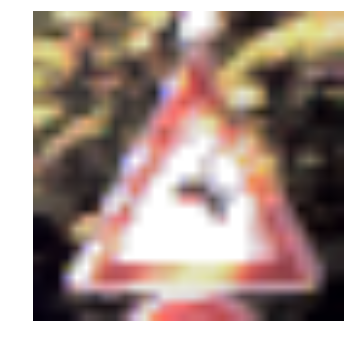

Class:  20


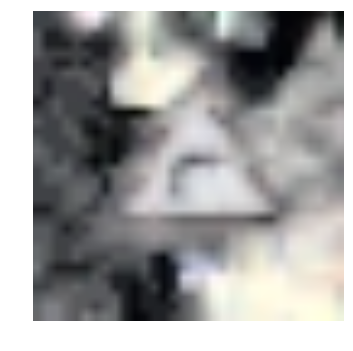

Class:  21


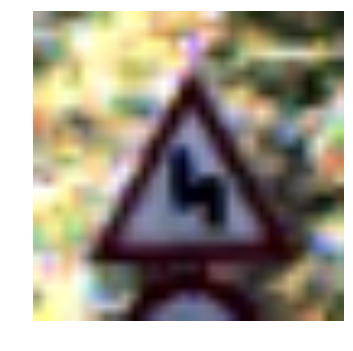

Class:  22


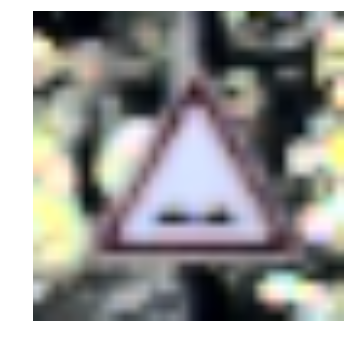

Class:  23


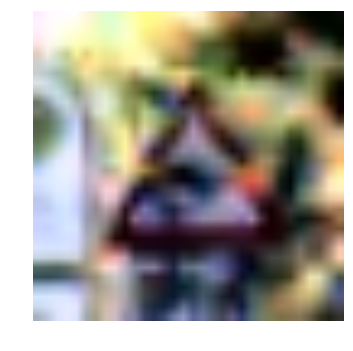

Class:  24


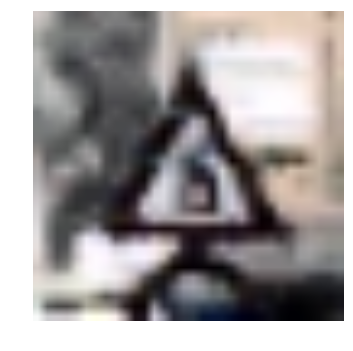

Class:  25


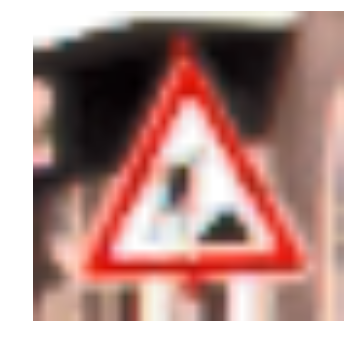

Class:  26


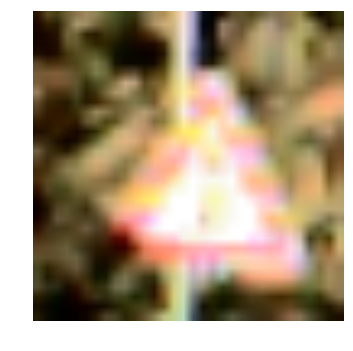

Class:  27


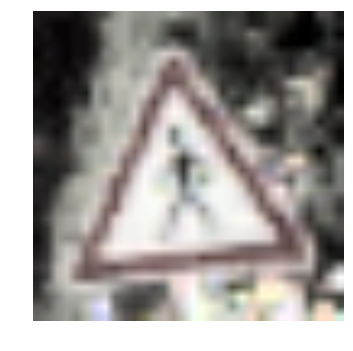

Class:  28


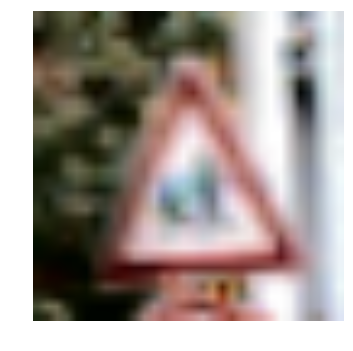

Class:  29


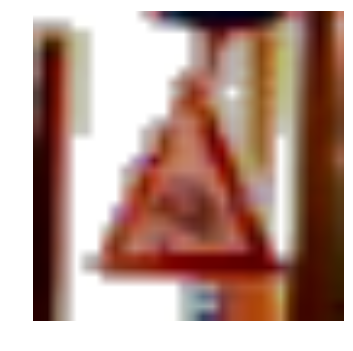

Class:  30


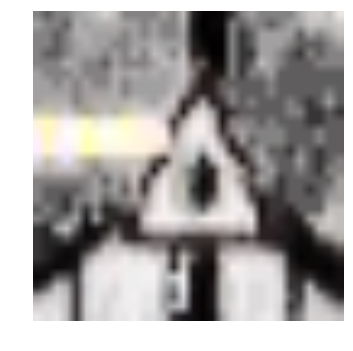

Class:  31


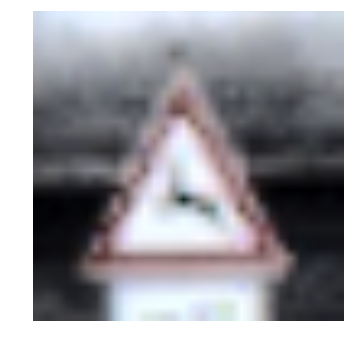

Class:  32


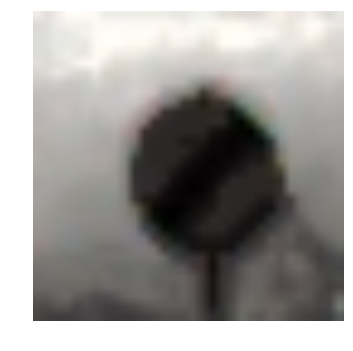

Class:  33


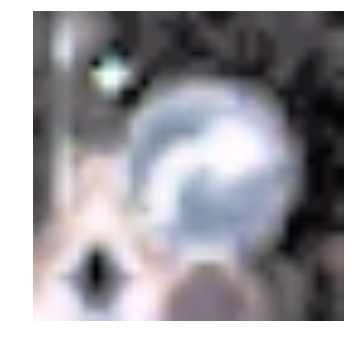

Class:  34


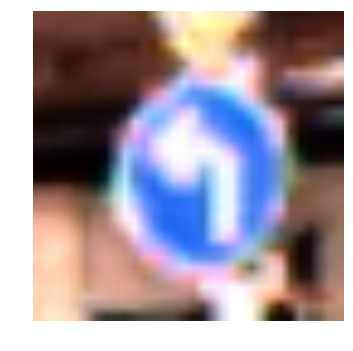

Class:  35


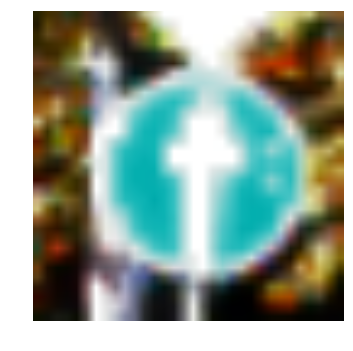

Class:  36


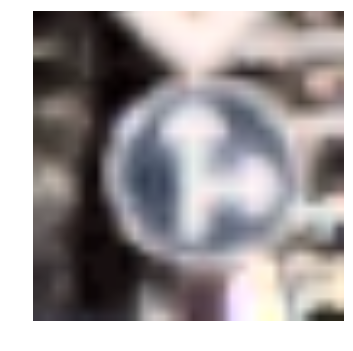

Class:  37


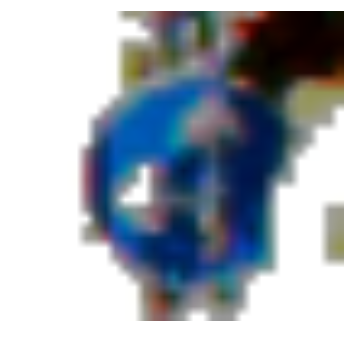

Class:  38


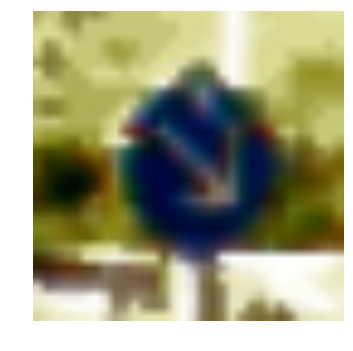

Class:  39


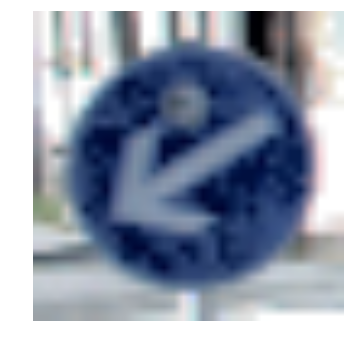

Class:  40


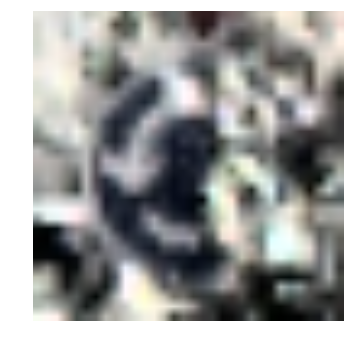

Class:  41


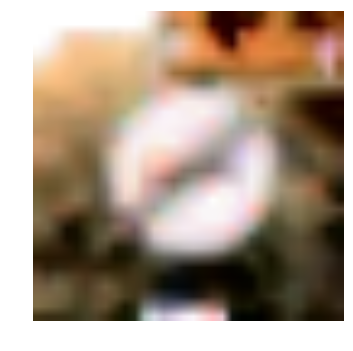

Class:  42


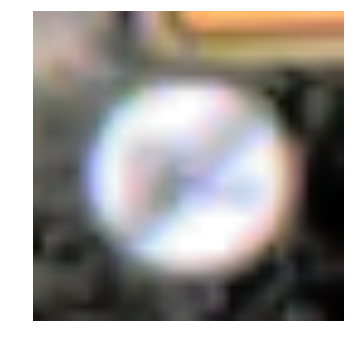

In [11]:
visualize_all(new_X_train, new_y_train)

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:** I used the idea in the suggested paper by Yann LeCun to pre-process the data. As suggested, I converted the images to YUV color scale and normalized the data using a built-in Open CV function. Overall the YUV images seem to work better than the RGB images so moving forward that is what will be used. 

A comparison between the original training data and the pre-processed training data can be seen above.

Most of the traffic signs are better distinguishable after pre-processing. The exception to this are some of the images where the pictures are so distorted that no amount of image processing could possibly make the traffic sign readable. Example: image in Class 32 above.

In [12]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

# First we will combine the test data and the train data
X_all = np.concatenate((X_train, X_test), axis = 0)
y_all = np.concatenate((y_train, y_test), axis = 0)

print("Merging training and testing data")
print("Total number of samples =", len(X_all))


Merging training and testing data
Total number of samples = 51839


In [13]:
### Regenerating images by rotating in between +/-15 degrees. (As explained in the paper)
### Credit to Mehdi Sqalli https://github.com/MehdiSv/TrafficSignsRecognition/
class_count  = np.bincount(y_all)
print('Regenerating data...')

import scipy.ndimage

# Generate additional data for underrepresented classes
print('Generating additional data...')
angles = [-5, 5, -10, 10, -15, 15,]

for i in range(len(class_count)):
    input_ratio = min(int(np.max(class_count) / class_count[i]) - 1, len(angles) - 1)

    if input_ratio <= 1:
        continue

    new_features = []
    new_labels = []
    mask = np.where(y_all == i)

    for j in range(input_ratio):
        for feature in X_all[mask]:
            new_features.append(scipy.ndimage.rotate(feature, angles[j], reshape=False))
            new_labels.append(i)

    X_all = np.append(X_all, new_features, axis=0)
    y_all = np.append(y_all, new_labels, axis=0)

print('Regenerating data completed. Number of total samples', len(y_all))

Regenerating data...
Generating additional data...
Regenerating data completed. Number of total samples 96477


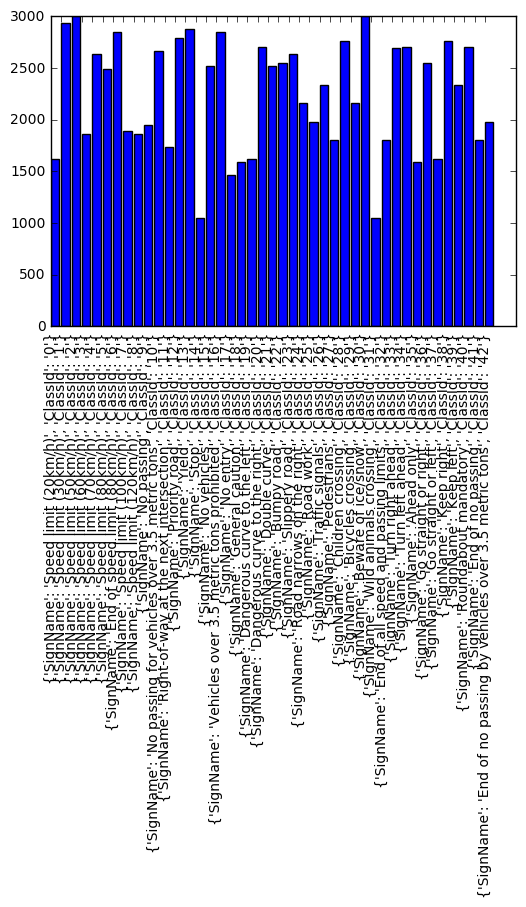

{'SignName': 'Speed limit (20km/h)', 'ClassId': '0'} Occurs 1620 times
{'SignName': 'Speed limit (30km/h)', 'ClassId': '1'} Occurs 2940 times
{'SignName': 'Speed limit (50km/h)', 'ClassId': '2'} Occurs 3000 times
{'SignName': 'Speed limit (60km/h)', 'ClassId': '3'} Occurs 1860 times
{'SignName': 'Speed limit (70km/h)', 'ClassId': '4'} Occurs 2640 times
{'SignName': 'Speed limit (80km/h)', 'ClassId': '5'} Occurs 2490 times
{'SignName': 'End of speed limit (80km/h)', 'ClassId': '6'} Occurs 2850 times
{'SignName': 'Speed limit (100km/h)', 'ClassId': '7'} Occurs 1890 times
{'SignName': 'Speed limit (120km/h)', 'ClassId': '8'} Occurs 1860 times
{'SignName': 'No passing', 'ClassId': '9'} Occurs 1950 times
{'SignName': 'No passing for vehicles over 3.5 metric tons', 'ClassId': '10'} Occurs 2670 times
{'SignName': 'Right-of-way at the next intersection', 'ClassId': '11'} Occurs 1740 times
{'SignName': 'Priority road', 'ClassId': '12'} Occurs 2790 times
{'SignName': 'Yield', 'ClassId': '13'} Oc

In [14]:
# Review occurences of each traffic sign in the new larger data set
analyze_data(y_all) 

In [15]:
# The new data needs to be shuffled and split into 3 different sets (training/validation/testing)
# This is done using the built-in functions in sklearn

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

X_all, y_all = shuffle(X_all, y_all)

print('splitting the total data into training/validation/testing sets...')

X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.2, stratify = y_all )
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, stratify = y_train )
print('Number of training samples and size', X_train.shape)
print('Number of validation samples and size', X_val.shape)
print('Number of testing samples and size', X_test.shape)

splitting the total data into training/validation/testing sets...
Number of training samples and size (61744, 32, 32, 3)
Number of validation samples and size (15437, 32, 32, 3)
Number of testing samples and size (19296, 32, 32, 3)


### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:** The dataset was combined, shuffled and then split 80:20 - Training data : Testing data.
The training data was further split 80:20 - Training data : Validation data.

Additional data was created using a helper function (credit: Mehdi Sqalli https://github.com/MehdiSv/TrafficSignsRecognition/). This rotates the images from -15 degrees to +15 degrees(Again this was based on the recommendation in the paper that was used as a guideline for this entire project) to create additional data. The smaller the initial sample, the larger the size of the additional data that is generated.

If you look at the initial distribution of classes, some classes are under represented. Increasing the sample size for each class helps create a more robust training set that in turn helps create a CNN to perform equally well regardless of the class that is being detected. The smallest sample size now is for "Class 31: Wild animals crossing" with a size of 1050.

In [16]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
pre_process_colorspace(X_train)
pre_process_colorspace(X_test)
pre_process_colorspace(X_val)

import tensorflow as tf

EPOCHS = 8
BATCH_SIZE = 128



In [17]:
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    #x_image = tf.reshape(x, [-1,32,32,1])
    x_image = x
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x_image, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 10.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

In [18]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:** The architecture used was the LeNet-5 which is a 5 layer Convolutional Neural Network. The architecture is the same used on the MNIST data set with the only difference being that the input images are RGB so the input data is 32x32x3 instead of the grayscale 32x32x1 images. A ReLU (rectified linear unit) is used as an activation function. Pooling is used before the 2 fully connected layers.

In [19]:
logits = LeNet(x)

In [20]:
logits

<tf.Tensor 'add_4:0' shape=(?, 43) dtype=float32>

In [21]:
### Train your model here.
### Feel free to use as many code cells as needed.
rate = 0.001

logits = LeNet(x)
softmax = tf.nn.softmax(logits)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)


In [22]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()
#save_file = '/Users/shrutireddye/CarND-Traffic-Sign-Classifier-Project/mymodel.ckpt'

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [23]:
import datetime

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)

    print("Training...")
    print("Start ",datetime.datetime.now().time())
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})

        validation_accuracy = evaluate(X_val, y_val)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
    print ("Finished ", datetime.datetime.now().time())

    saver.save(sess, 'lenet')
    print("Model saved")

Training...
Start  18:07:19.588484

EPOCH 1 ...
Validation Accuracy = 0.758

EPOCH 2 ...
Validation Accuracy = 0.872

EPOCH 3 ...
Validation Accuracy = 0.911

EPOCH 4 ...
Validation Accuracy = 0.932

EPOCH 5 ...
Validation Accuracy = 0.941

EPOCH 6 ...
Validation Accuracy = 0.942

EPOCH 7 ...
Validation Accuracy = 0.952

EPOCH 8 ...
Validation Accuracy = 0.955

Finished  18:11:55.338233
Model saved


In [24]:

print(np.shape(logits))
print(logits)
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    output = sess.run(softmax, feed_dict={x: X_test[0:len(X_test)]})
print(output)

()
Tensor("add_9:0", shape=(?, 43), dtype=float32)
[[  0.00000000e+00   2.23603314e-17   2.01215837e-02 ...,   1.98637063e-27
    0.00000000e+00   9.51280080e-21]
 [  0.00000000e+00   4.61479928e-20   1.12405287e-14 ...,   3.49657309e-35
    0.00000000e+00   3.96131458e-23]
 [  0.00000000e+00   3.45996059e-22   4.55558848e-06 ...,   1.43329641e-02
    0.00000000e+00   2.80073341e-14]
 ..., 
 [  0.00000000e+00   5.98937835e-26   2.88232216e-10 ...,   0.00000000e+00
    0.00000000e+00   9.05235559e-24]
 [  0.00000000e+00   1.80025352e-16   3.60401908e-09 ...,   5.69519460e-01
    0.00000000e+00   7.23800017e-03]
 [  0.00000000e+00   1.41731634e-14   2.03258714e-25 ...,   0.00000000e+00
    0.00000000e+00   2.55675373e-22]]


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:** The parameters used were:
Batch Size: 128 (tested with 60/128/150/200)
Epochs: 8    (tested with a range of 8 - 15)
Optimizer: Adam Optimizer - after a bit of research I found out that this works better than the gradient descent optimizer. This requires more computation power but since I was running the code locally on my machine on a well equipped GPU, I chose this.
Learning rate: .001 (tested with 0.01/0.001/0.003)

An accuracy of 95.1% was acheived on the validation test set using these parameters.




### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:** There was not a lot of trial and error to arrive at this solution. Using a well established LeNet-5 (which was the suggested baseline to this project) architecture the only variables were the epochs, batch size and learning rate which was adjusted until I reached the highest accuracy rate with my current choice.

After a bit of research I found that there are a few other architectures that perform at a much higher accuracy, namely the AlexNet, GoogLeNet, ZFNet, VGGNet and the current reigning champion - the ResNet. The LeNet-5 was used due to the simple nature of the architecture while acheiving satisfactory results.

As expected the test acuracy was slightly lower than the validation accuracy but still acheived an accuracy of 93.8%

In [ ]:
# Convert images to YUV space and normalize before running through the trained model
pre_process_colorspace(X_test)    

with tf.Session() as sess:
    tf.global_variables_initializer().run()
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    test_accuracy = evaluate(X_test, y_test)
    output = sess.run(softmax, feed_dict={x: X_test[0:len(X_test)]})
   
    print("Test Accuracy = {:.3f}".format(test_accuracy))

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:** I chose traffic signs from the U.A.E. I chose these since they are similar to the traffic signs trained on, however they also have text written in arabic so it would be a good test to see if the model is affected by characters it does not recognize.
The images were taken off a chart and then split into multiple images so the image sizes are not uniform. The images are resized to 32x32 before they are put through the classifier. A mix of signs that were previously defined and some new signs that the classifier has never seen was used to see how the model worked.

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

import matplotlib.image as mpimg


image1 = cv2.imread('40.png')
image2 = cv2.imread('no_left_turn.png')
image3 = cv2.imread('120_80.png')
image4 = cv2.imread('no_waiting.png')
image5 = cv2.imread('2_way.png')

imgs = [image1, image2, image3, image4, image5]

"""labels = {0: 'Speed limit (40km/h)',
          1: 'No left turn',
          2: 'Speed limit (120km/h for cars) (80km/h for trucks)',
          3: 'No waiting',
          4: 'Two way road'}"""

new_label_name = label_name
new_label_name.append('Others')

# Displaying the raw images prior to any processing or resizing. The images are also appended to an array "new_input"

for i in range(5):
        image = imgs[i].squeeze() 
        plt.imshow(image)
        plt.show()


In [ ]:
#Resize images and load into 4D array
new_input = []
for i in imgs:
    x = cv2.resize(i,(32,32))
    new_input.append(x)
    
for i in range(5):
    plt.imshow(new_input[i])
    plt.show()
    print(new_input[i].shape)



In [ ]:
labels = [43,43,8,43,43]
labels = np.asarray(labels, dtype=np.float32)
labels

In [ ]:
pre_process_colorspace(new_input) 


for i in range(5):
    image = new_input[i].squeeze()   
    plt.imshow(image)
    plt.axis('off')        
    plt.show()

print(new_input[0].shape)

In [ ]:
new_input = np.asarray(new_input, dtype=np.float32)

#Now that we have all our images loaded into a 4D array of shape (5, 32, 32, 3) we can apply our trained model to see how it performs



In [ ]:
new_input

In [ ]:
### Run the predictions here.
### Feel free to use as many code cells as needed.


x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.float32, (None))
keep_prob = tf.placeholder(tf.float32)

In [ ]:
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    test_accuracy = evaluate(new_input, labels)    
    
    ### Visualize the softmax probabilities 
    
    prediction = sess.run(softmax, feed_dict={x: new_input[0:len(new_input)]})
    #print("Test Accuracy = {:.3f}".format(test_accuracy))
print(prediction)


In [ ]:
X_train

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

In [ ]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In [ ]:
# Initialize and get the top 5 values and the corresponding indices for each of the 5 images
init_op = tf.global_variables_initializer()

with tf.Session() as sess: 
    sess.run(init_op)
    topFive = sess.run(tf.nn.top_k(tf.constant(prediction), k=5))    
    values = np.array([topFive.values])
    print(np.shape(values))
    indices = np.array([topFive.indices])
    print(np.shape(indices))
print(topFive)

In [ ]:
def plot_top_k_probabilities(pred_cls, pred_prob, title):
    plt.plot(list(pred_cls), list(pred_prob), 'ro')
    x1,x2,y1,y2 = plt.axis()
    plt.axis((x1-1,x2+1,y1,y2+0.1))

    plt.ylabel('Probability')
    plt.title(title) 
    plt.show()    
    

for i in range(len(values)):
               
    predicted_class = indices[i] #.[np.argmax(values[i])]    
    correct_class = labels
    
    plot_title = 'Predicted: {}\nCorrect: {}'.format(predicted_class, correct_class)     
    plot_top_k_probabilities(indices[i], values[i], plot_title)
    
    print('raw top_k results:')
    print('')
    print('tf.nn.top_k(prediction, 5).values ', list(values[i]))
    print('tf.nn.top_k(prediction, 5).indices', list(indices[i]))    
    
    print('')
    print('')